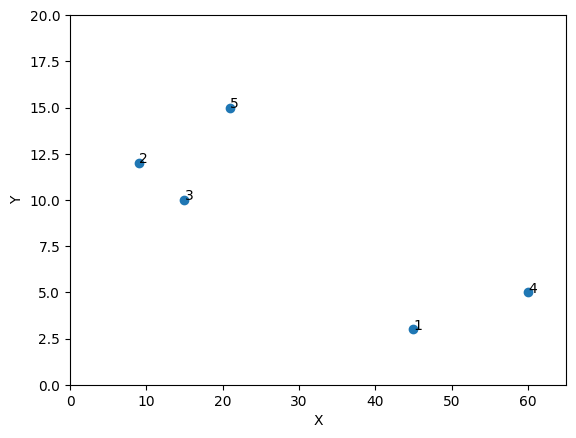

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 리스트: X, Y
data = np.array([[45, 3], [9, 12],
                [15, 10], [60, 5],
                [21, 15]])
data

# 원데이터의 X, Y의 산포도
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 65)
plt.ylim(0, 20)

# 행과 열의 수
rows, columns = data.shape
# 데이터 라벨
for i in range(rows):
  plt.annotate(i+1, (data[i,0], data[i,1]))

In [ ]:
scaler = StandardScaler()
scaler.fit(data)
data_std = scaler.transform(data)
print(data_std)

[[ 0.77521709 -1.35526185]
 [-1.08530393  0.67763093]
 [-0.77521709  0.22587698]
 [ 1.55043418 -0.9035079 ]
 [-0.46513025  1.35526185]]


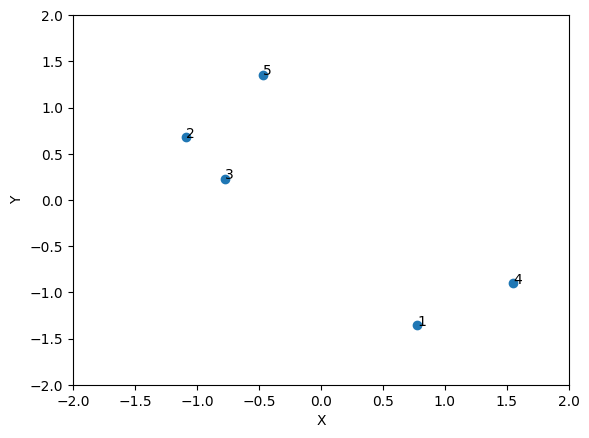

In [ ]:
# 원데이터의 X, Y의 산포도
plt.scatter(data_std[:,0], data_std[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape
# 데이터 라벨
for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1]))

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_std)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 0 1]
[[ 1.16282564 -1.12938488]
 [-0.77521709  0.75292325]]


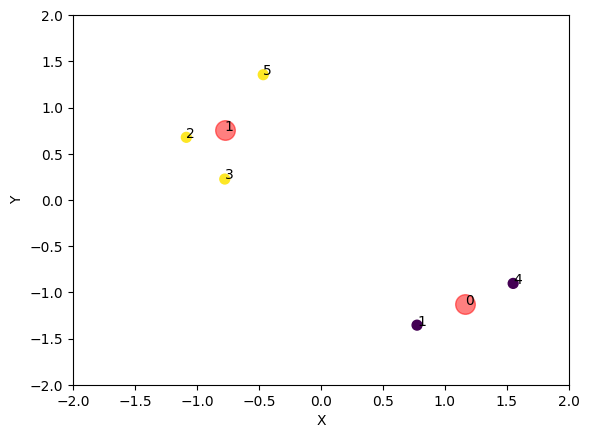

In [ ]:
# 원데이터의 X, Y의 산포도
plt.scatter(data_std[:,0], data_std[:,1], c=kmeans.labels_, s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape
# 데이터 라벨
for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1]))

plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='red', s=200, alpha=0.5)
K=2
for k in range(0,K):
  plt.annotate(k, (kmeans.cluster_centers_[k,0], kmeans.cluster_centers_[k,1]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

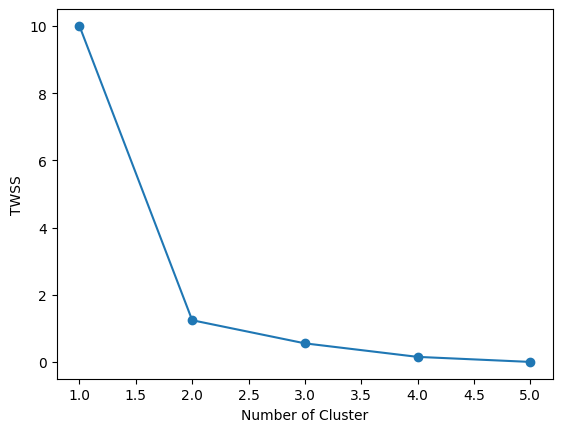

In [ ]:
TWSS = {}

for k in range(1,6):
  #군집 수 설정과 군집화 객체 생성
  model = KMeans(n_clusters=k)
  # 표준화된 X, Y 데이터에 대한 군집화
  model.fit(data_std)
  # 군집 수별 TWSS 값 저장
  TWSS[k] = model.inertia_

plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Cluster")
plt.ylabel("TWSS")
plt.show()